# Common lightcurve times

In [1]:
import os
os.chdir('../../scripts')
from analysis_tools_cython import *
from tqdm import tqdm
from post_processing import *

In [2]:
data = get_output('../eleanor-lite-combined-v3.txt')
data.drop_duplicates(inplace=True)
# data = pd.read_csv('../ eleanor-lite_combined_corrflux.txt',header=None)
# with open("colnames.json", "r", encoding="utf-8") as f:
#     check = f.read()
#     columns = json.loads(check)
#     columns = columns["column_names"]
# data.columns = columns
tqdm.pandas()

data['abs_path'] = data['path'].progress_apply(lambda x: x.replace('/tmp/eleanor-lite/', '/storage/astro2/phrdhx/eleanor-lite-project-v2/'))
data['Sector'] = data['path'].str.extract(r'/s(\d+)/').astype(int)
data.insert(2, 'Sector', data.pop('Sector'))


100%|██████████| 15477322/15477322 [00:14<00:00, 1080873.59it/s]


In [3]:
sector_data = {}

# Get unique values from the 'Sector' column
sector_values = sorted(data['Sector'].unique())

# Iterate through each unique sector value and create dataframes
for sector in sector_values:
    # Create a reference to the subset of the original DataFrame for the current sector
    sector_df = data[data['Sector'] == sector]
    
    # You can perform any additional data manipulation or filtering here if needed
    
    # Store the sector DataFrame in the dictionary with a meaningful key
    sector_data[f'S{sector}'] = sector_df

In [4]:
lightcurve = {}

## Data before any cuts

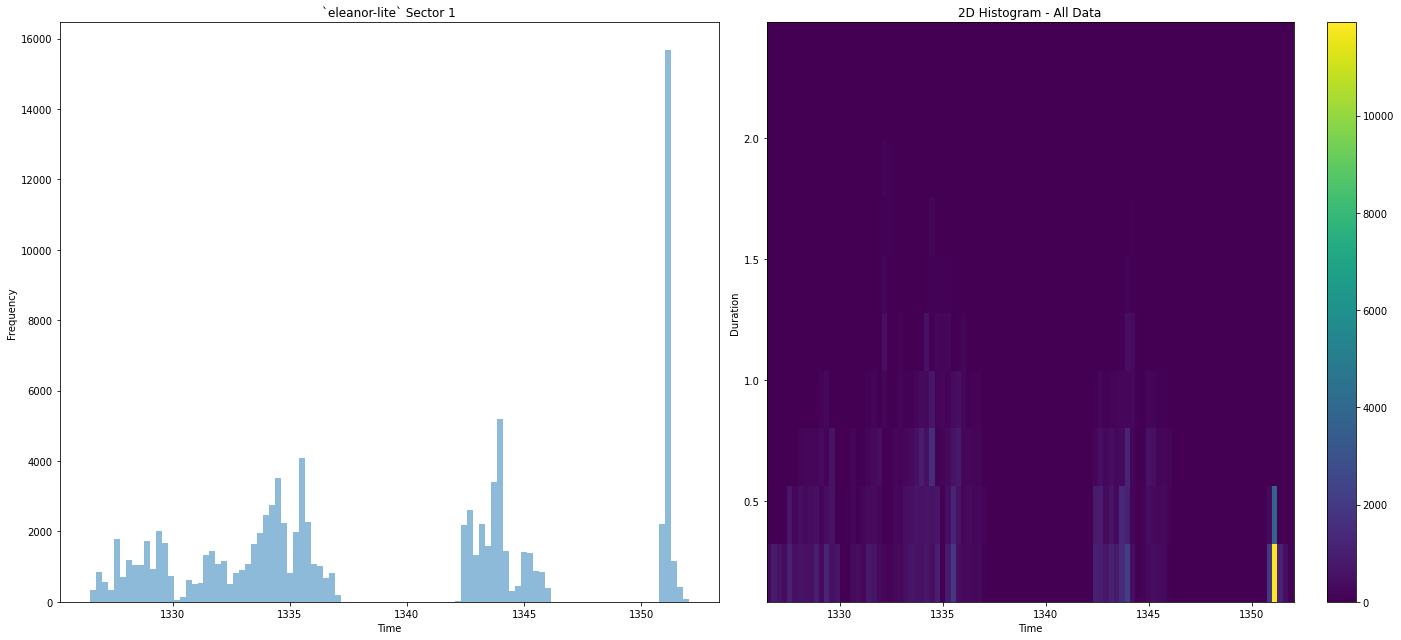

In [5]:
for i in range(1,len(sector_values)+1):
    # Construct the dataframe variable name
    try:    
        df = sector_data[f'S{i}']
        data = df[df.transit_prob == 'maybeTransit']
        data = data[(data.asym_score <= 3)].reset_index(drop=True)
        
        #data_new = data[abs(data.snr) >= 5].reset_index(drop=True)
        #data_new.drop(data_new[data_new['duration'] <= 0.4].index, inplace=True)
        #data_new['abs_depth'] = abs(data_new.depth)
        #data_new.drop(data_new[(data_new['abs_depth'] >= 0.01)].index, inplace=True)
    except KeyError:
        # Handle the case where the dataframe variable doesn't exist
        print(f"Dataframe '{i}' not found. Moving to the next sector.")
        continue
        
    ## Get the path for the first lightcurve in each sector
    first_abs_path = data.loc[0, 'abs_path']
    lc, _ = import_lightcurve(first_abs_path)
    flux = lc[lc.colnames[1]]
    
    # Calculate the histogram values and bin edges using np.histogram
    time_histogram, bin_edges = np.histogram(data['time'], bins=100)
    # Plot the original 'data_new.time' histogram
    fig, ax = plt.subplots(1,2, figsize=(20, 9))
    ax[0].hist(data['time'], bins=bin_edges, alpha=0.5)
    #ax[1].hist(data_xrp['time'], bins=bin_edges, alpha=0.5)
    ax[0].set_title('`eleanor-lite` Sector {}'.format(i))
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Frequency')
    
    #ax[1].scatter(data.time,(data.depth)*np.median(flux))
    
    h1 = ax[1].hist2d(data['time'], data['duration'], bins=[100,10])
    ax[1].set_title('2D Histogram - All Data')
    ax[1].set_xlabel('Time')
    ax[1].set_ylabel('Duration')
    plt.colorbar(h1[3], ax=ax[1])


    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()
    break

## SNR 5 cut

size of sample after SNR cut 11584


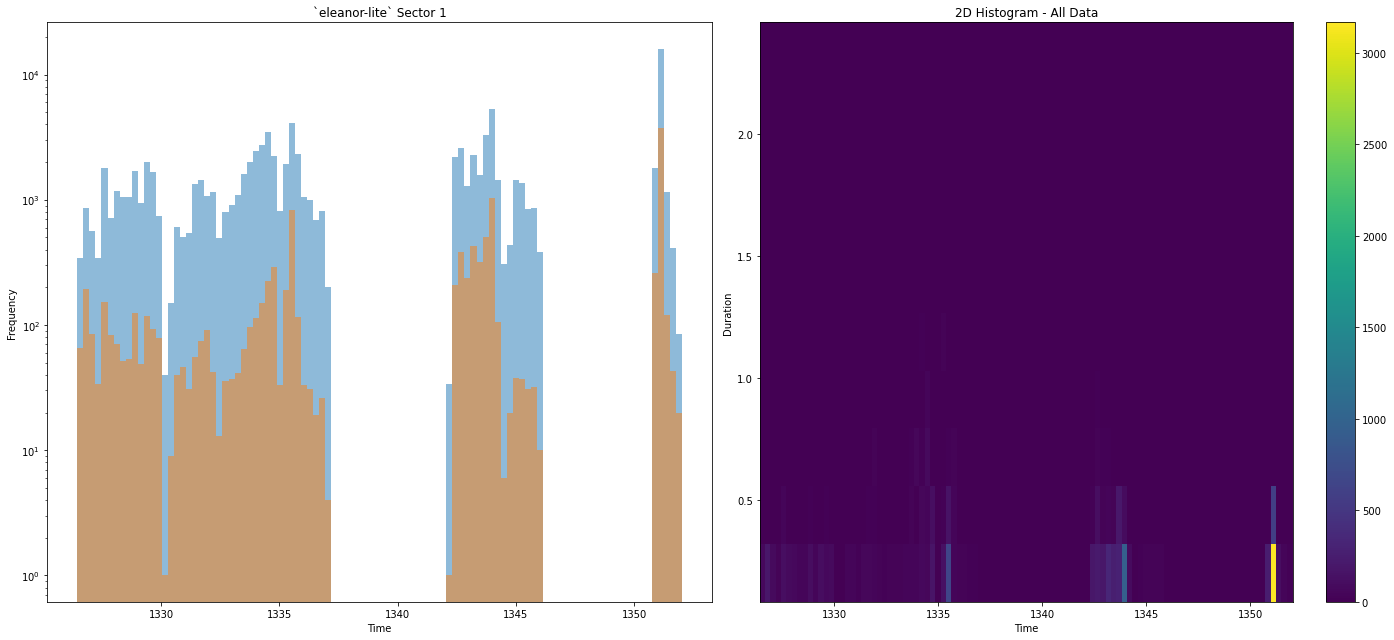

In [6]:
for i in range(1,len(sector_values)+1):
    # Construct the dataframe variable name
    try:    
        df = sector_data[f'S{i}']
        data = df[df.transit_prob == 'maybeTransit']
        data = data[(data.asym_score <= 3)].reset_index(drop=True)
        
        data_new = data[(abs(data.snr) >= 5) & (data.asym_score > 0.8) ].reset_index(drop=True) # gets rid of any fits we know should not be the case
        print("size of sample after SNR cut", len(data_new))
        #data_new.drop(data_new[data_new['duration'] <= 0.4].index, inplace=True)
        #data_new['abs_depth'] = abs(data_new.depth)
        #data_new.drop(data_new[(data_new['abs_depth'] >= 0.01)].index, inplace=True)
    except KeyError:
        # Handle the case where the dataframe variable doesn't exist
        print(f"Dataframe '{i}' not found. Moving to the next sector.")
        continue
        
    ## Get the path for the first lightcurve in each sector
    first_abs_path = data.loc[0, 'abs_path']
    lc, _ = import_lightcurve(first_abs_path)
    flux = lc[lc.colnames[1]]
    
    # Calculate the histogram values and bin edges using np.histogram
    time_histogram, bin_edges = np.histogram(data_new['time'], bins=100)
    # Plot the original 'data_new.time' histogram
    fig, ax = plt.subplots(1,2, figsize=(20, 9))
    ax[0].hist(data['time'], bins=bin_edges, alpha=0.5)
    ax[0].hist(data_new['time'], bins=bin_edges, alpha=0.5)
    #ax[1].hist(data_xrp['time'], bins=bin_edges, alpha=0.5)
    ax[0].set_title('`eleanor-lite` Sector {}'.format(i))
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Frequency')
    
    #ax[1].scatter(data.time,(data.depth)*np.median(flux))
    
    h1 = ax[1].hist2d(data_new['time'], data_new['duration'], bins=[100,10])
    ax[1].set_title('2D Histogram - All Data')
    ax[1].set_xlabel('Time')
    ax[1].set_ylabel('Duration')
    plt.colorbar(h1[3], ax=ax[1])
    ax[0].set_yscale('log')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()
    break

---
## 0.4 Duration Cut

size of sample after SNR and duration cut 10383


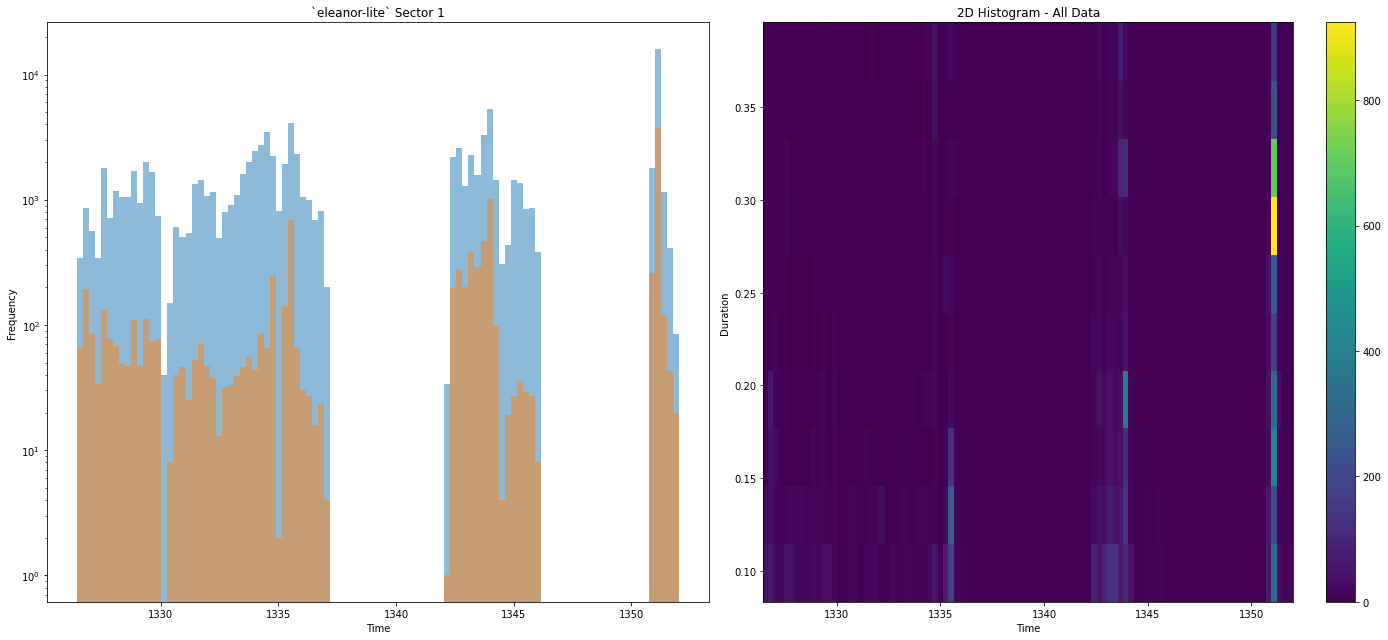

In [7]:
for i in range(1,len(sector_values)+1):
    # Construct the dataframe variable name
    try:    
        df = sector_data[f'S{i}']
        data = df[df.transit_prob == 'maybeTransit']
        data = data[(data.asym_score <= 3)].reset_index(drop=True)
        
        data_new = data[(abs(data.snr) >= 5) & (data.asym_score > 0.8) ].reset_index(drop=True) # gets rid of any fits we know should not be the case
        data_new.drop(data_new[data_new['duration'] >= 0.4].index, inplace=True)
        print("size of sample after SNR and duration cut", len(data_new))

        #data_new['abs_depth'] = abs(data_new.depth)
        #data_new.drop(data_new[(data_new['abs_depth'] >= 0.01)].index, inplace=True)
    except KeyError:
        # Handle the case where the dataframe variable doesn't exist
        print(f"Dataframe '{i}' not found. Moving to the next sector.")
        continue
        
    ## Get the path for the first lightcurve in each sector
    first_abs_path = data.loc[0, 'abs_path']
    lc, _ = import_lightcurve(first_abs_path)
    flux = lc[lc.colnames[1]]
    
    # Calculate the histogram values and bin edges using np.histogram
    time_histogram, bin_edges = np.histogram(data_new['time'], bins=100)
    # Plot the original 'data_new.time' histogram
    fig, ax = plt.subplots(1,2, figsize=(20, 9))
    ax[0].hist(data['time'], bins=bin_edges, alpha=0.5)
    ax[0].hist(data_new['time'], bins=bin_edges, alpha=0.5)
    #ax[1].hist(data_xrp['time'], bins=bin_edges, alpha=0.5)
    ax[0].set_title('`eleanor-lite` Sector {}'.format(i))
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Frequency')
    
    #ax[1].scatter(data.time,(data.depth)*np.median(flux))
    
    h1 = ax[1].hist2d(data_new['time'], data_new['duration'], bins=[100,10])
    ax[1].set_title('2D Histogram - All Data')
    ax[1].set_xlabel('Time')
    ax[1].set_ylabel('Duration')
    plt.colorbar(h1[3], ax=ax[1])
    ax[0].set_yscale('log')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()
    break

## Last major cut: 0.1% cuts

size of sample after SNR, duration, and depth cut 1055


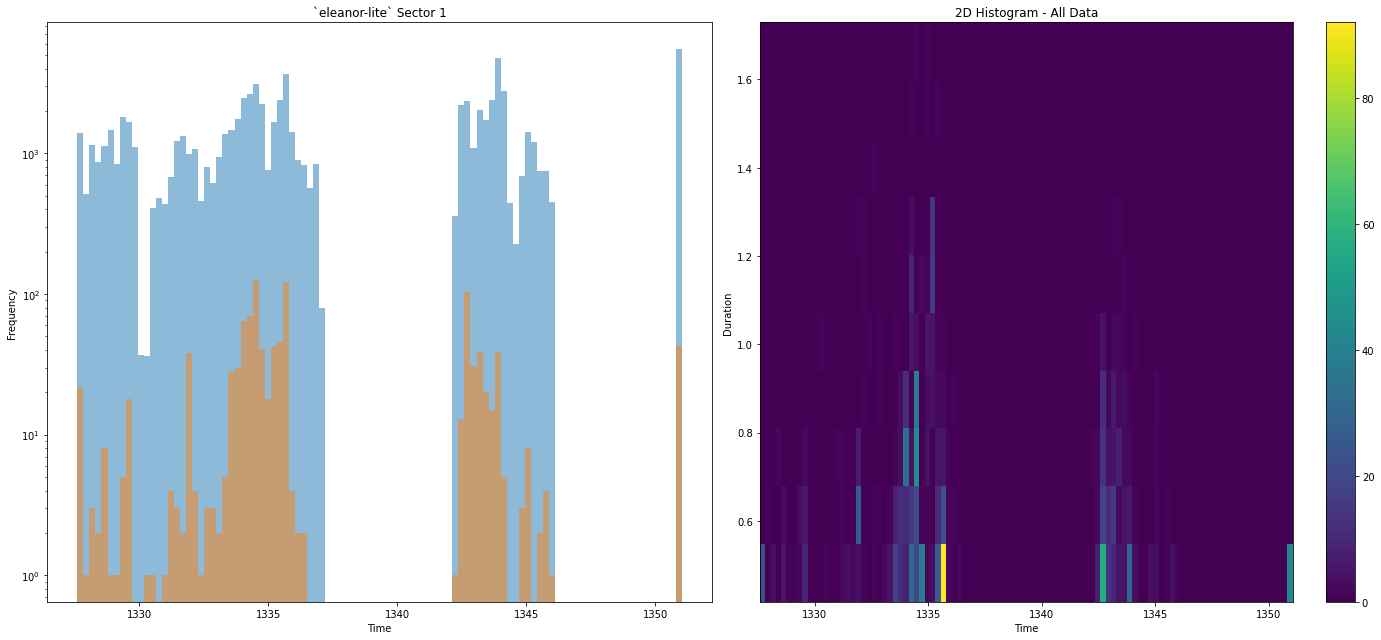

In [8]:
for i in range(1,len(sector_values)+1):
    # Construct the dataframe variable name
    try:    
        df = sector_data[f'S{i}']
        data = df[df.transit_prob == 'maybeTransit']
        data = data[(data.asym_score <= 3)].reset_index(drop=True)
        
        data_new = data[(abs(data.snr) >= 5) & (data.asym_score > 0.8) ].reset_index(drop=True) # gets rid of any fits we know should not be the case
        data_new.drop(data_new[data_new['duration'] <= 0.4].index, inplace=True)
        data_new['abs_depth'] = abs(data_new.depth)
        ## less than 1%
        data_new.drop(data_new[(data_new['abs_depth'] >= 0.01)].index, inplace=True)
        print("size of sample after SNR, duration, and depth cut", len(data_new))

    except KeyError:
        # Handle the case where the dataframe variable doesn't exist
        print(f"Dataframe '{i}' not found. Moving to the next sector.")
        continue
        
    ## Get the path for the first lightcurve in each sector
    first_abs_path = data.loc[0, 'abs_path']
    lc, _ = import_lightcurve(first_abs_path)
    flux = lc[lc.colnames[1]]
    
    # Calculate the histogram values and bin edges using np.histogram
    time_histogram, bin_edges = np.histogram(data_new['time'], bins=100)
    # Plot the original 'data_new.time' histogram
    fig, ax = plt.subplots(1,2, figsize=(20, 9))
    ax[0].hist(data['time'], bins=bin_edges, alpha=0.5)
    ax[0].hist(data_new['time'], bins=bin_edges, alpha=0.5)
    #ax[1].hist(data_xrp['time'], bins=bin_edges, alpha=0.5)
    ax[0].set_title('`eleanor-lite` Sector {}'.format(i))
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Frequency')
    
    #ax[2].scatter(data.time,(data.depth)*np.median(flux))
    
    h1 = ax[1].hist2d(data_new['time'], data_new['duration'], bins=[100,10])
    ax[1].set_title('2D Histogram - All Data')
    ax[1].set_xlabel('Time')
    ax[1].set_ylabel('Duration')
    plt.colorbar(h1[3], ax=ax[1])
    ax[0].set_yscale('log')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()
    break

## Return dataframes for lightcurves *without* common time anomalies

In [9]:
import astropy.units as u
from matplotlib.backends.backend_pdf import PdfPages


In [10]:
tic = pd.read_csv('../catalogs/super_catalog.txt',sep='\t')

mad threshold: 40.0


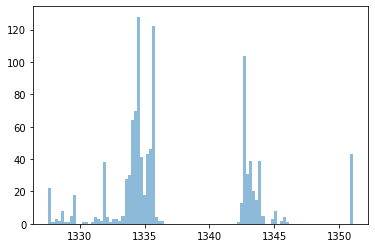

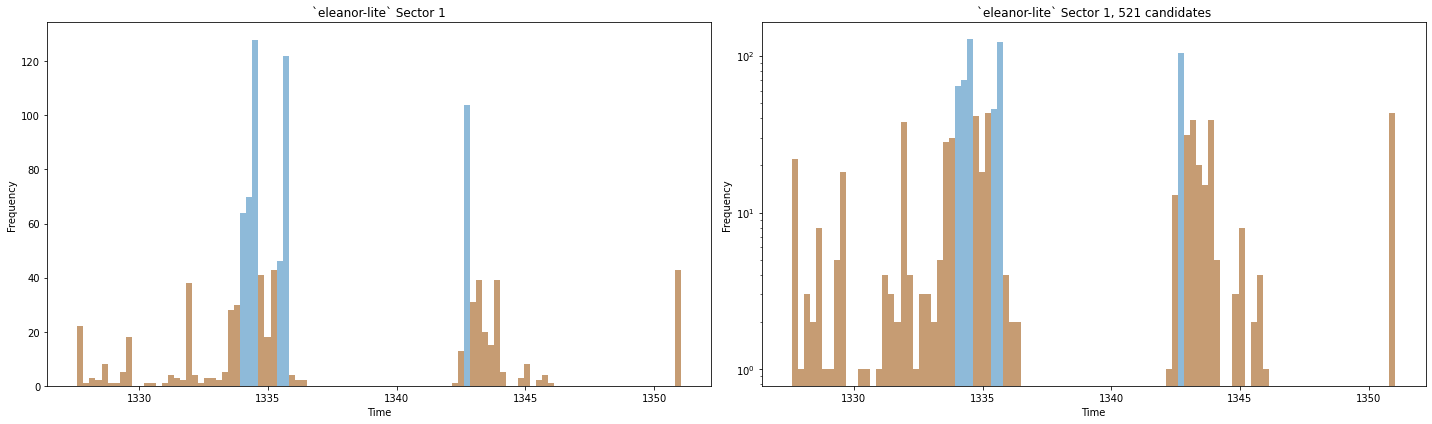

mad threshold: 10.0


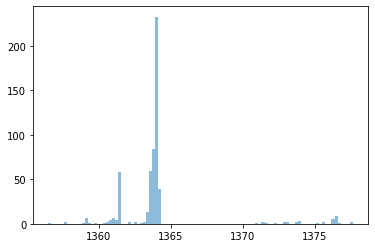

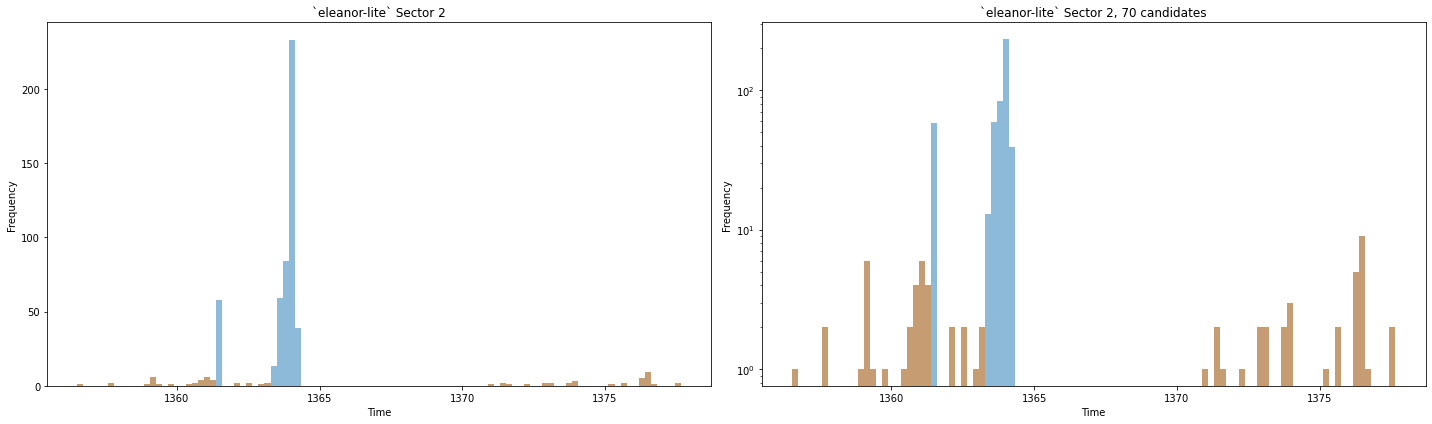

mad threshold: 0.0


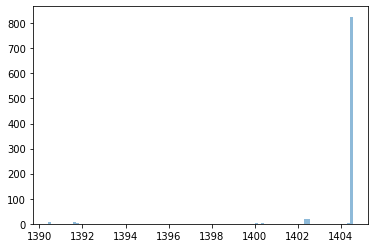

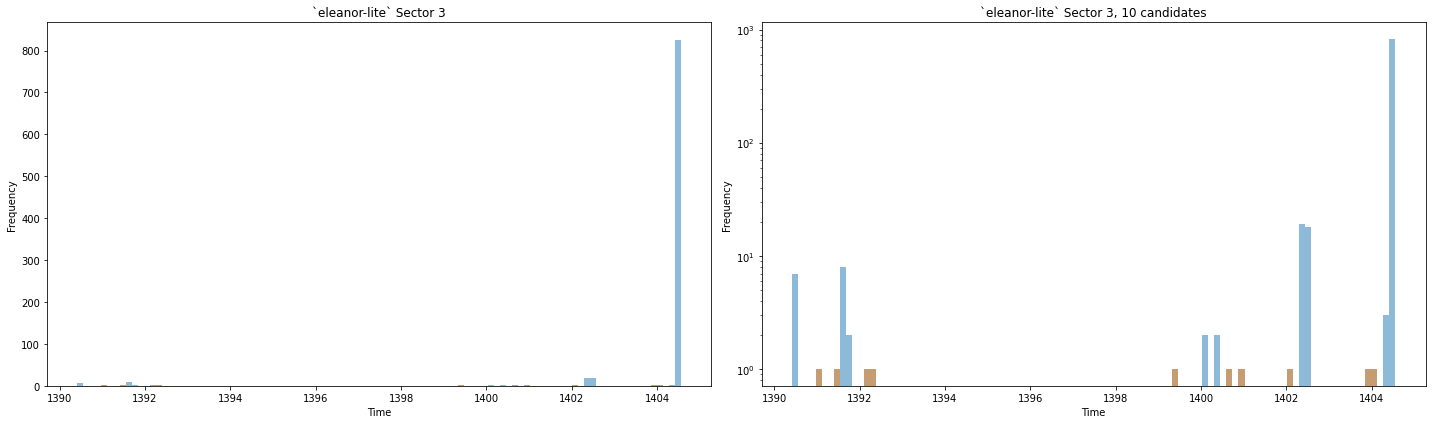

mad threshold: 20.0


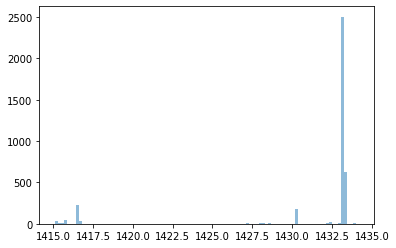

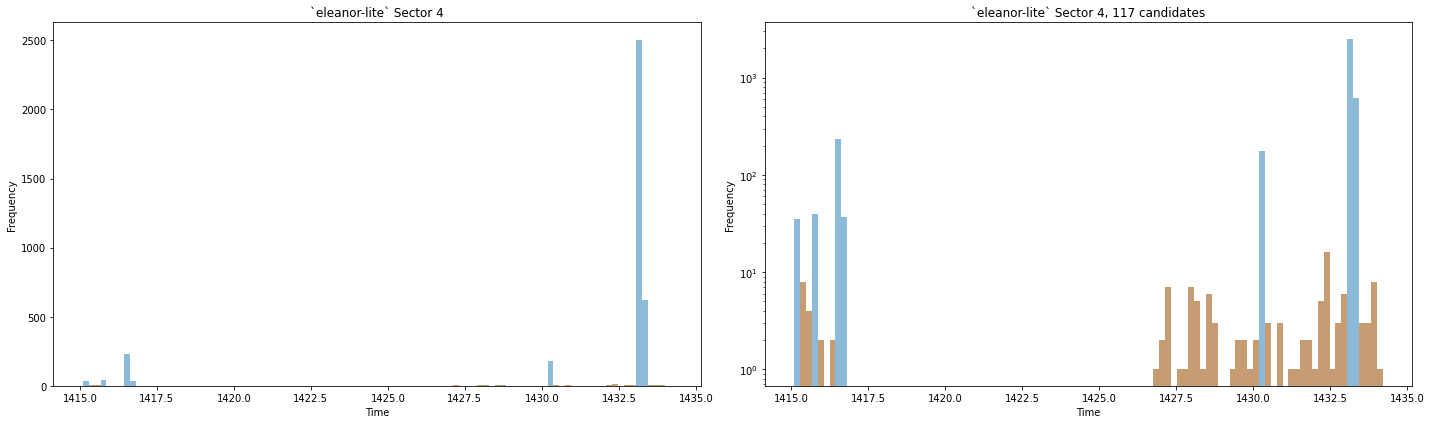

mad threshold: 20.0


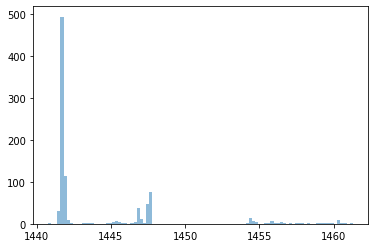

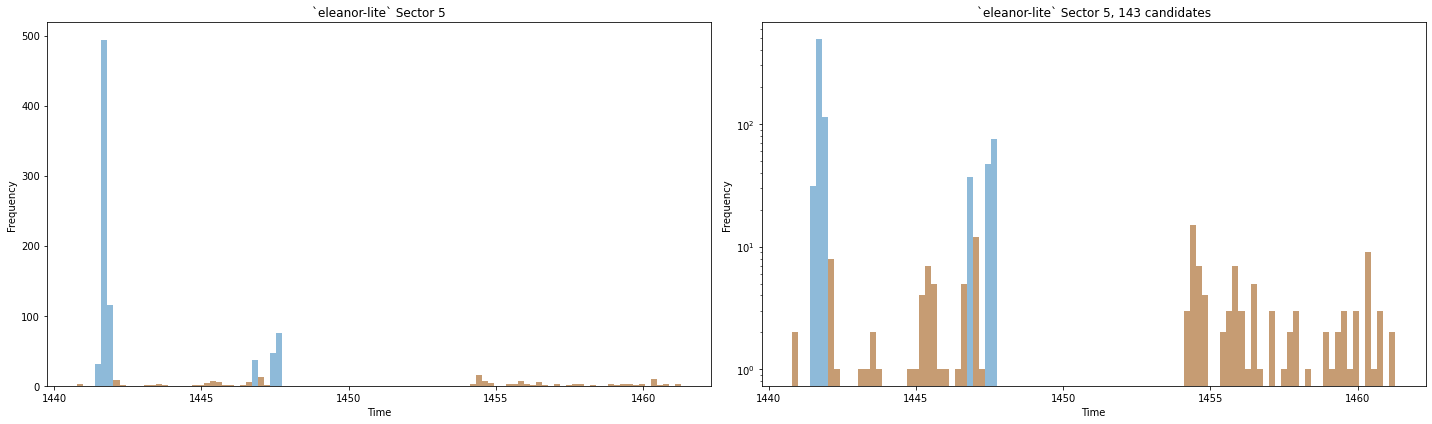

mad threshold: 20.0


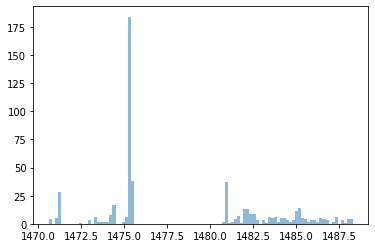

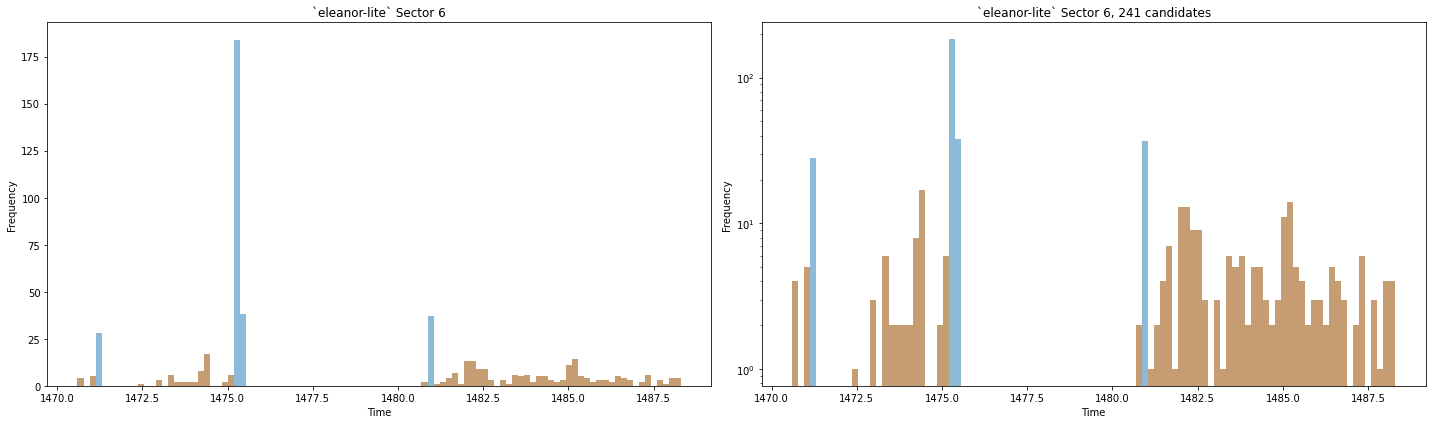

mad threshold: 45.0


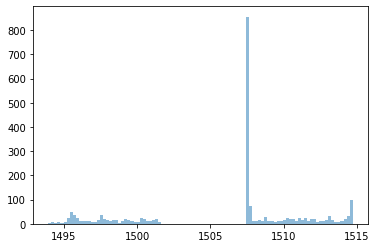

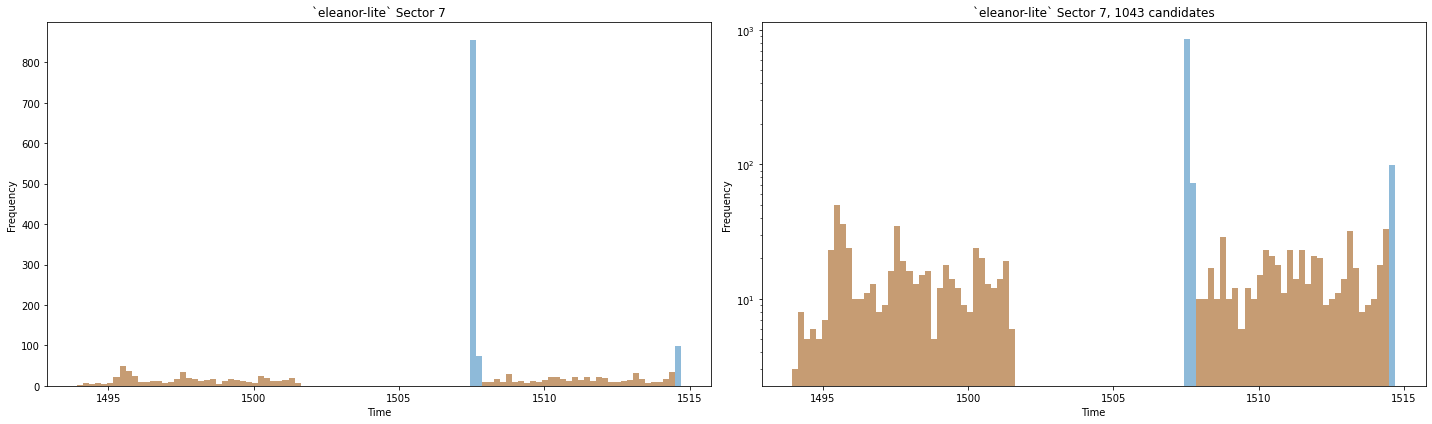

mad threshold: 90.0


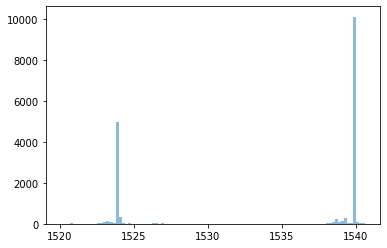

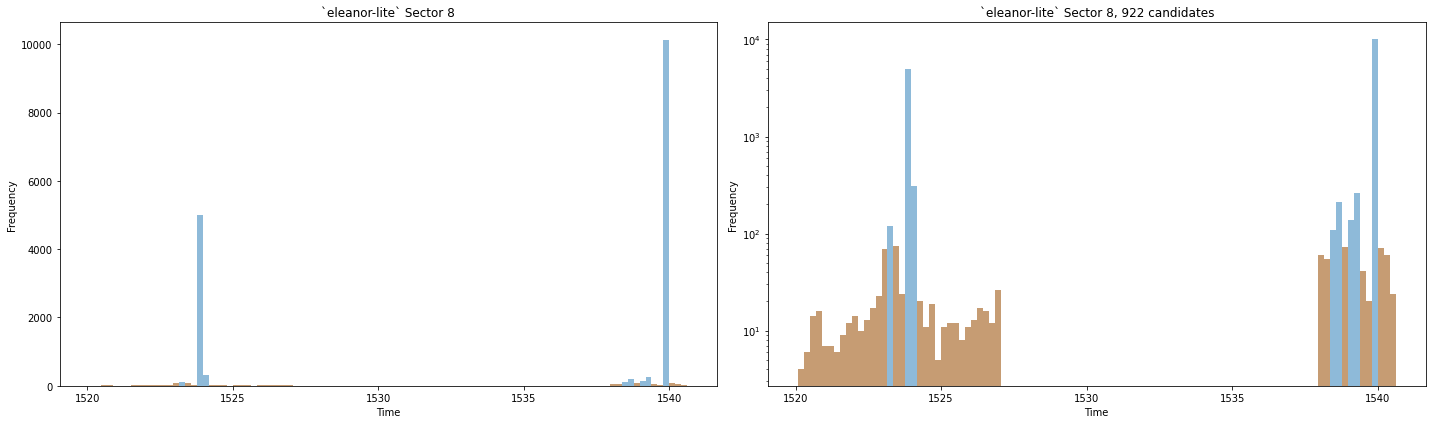

mad threshold: 20.0


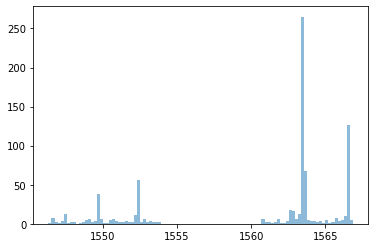

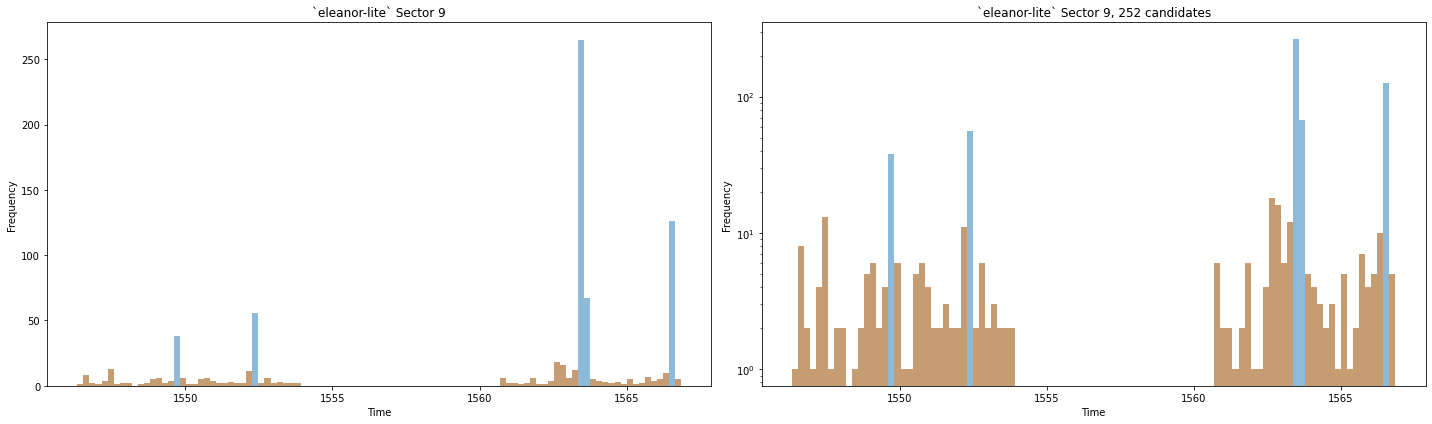

mad threshold: 20.0


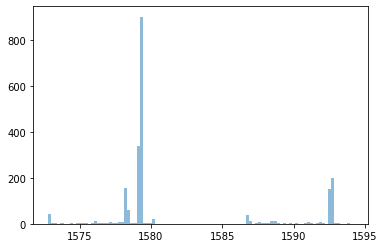

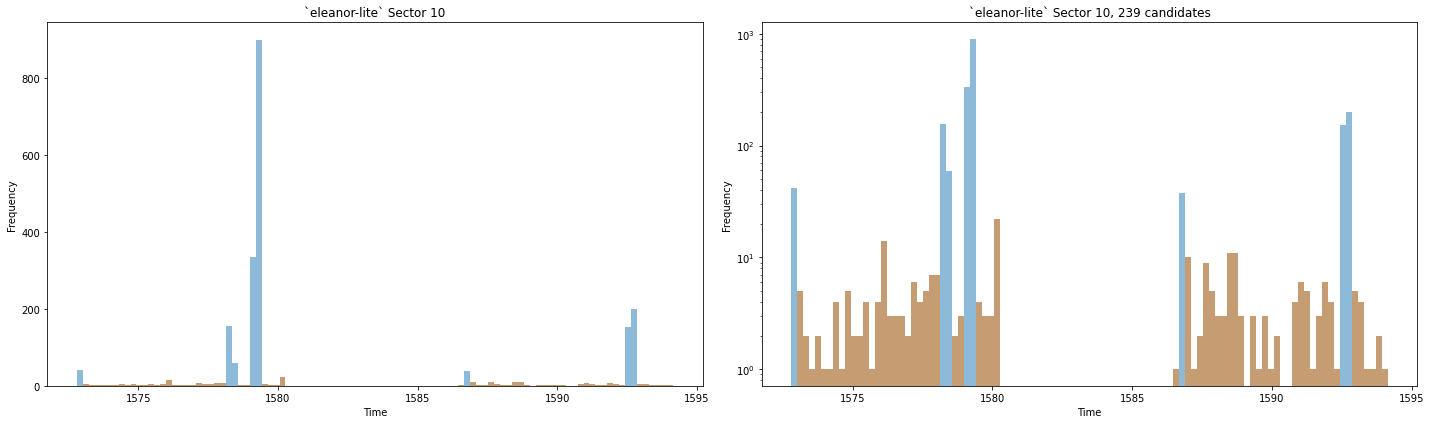

mad threshold: 30.0


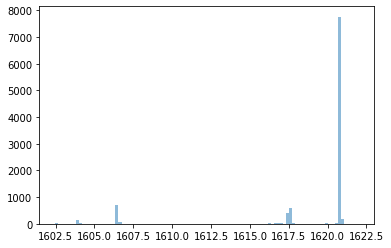

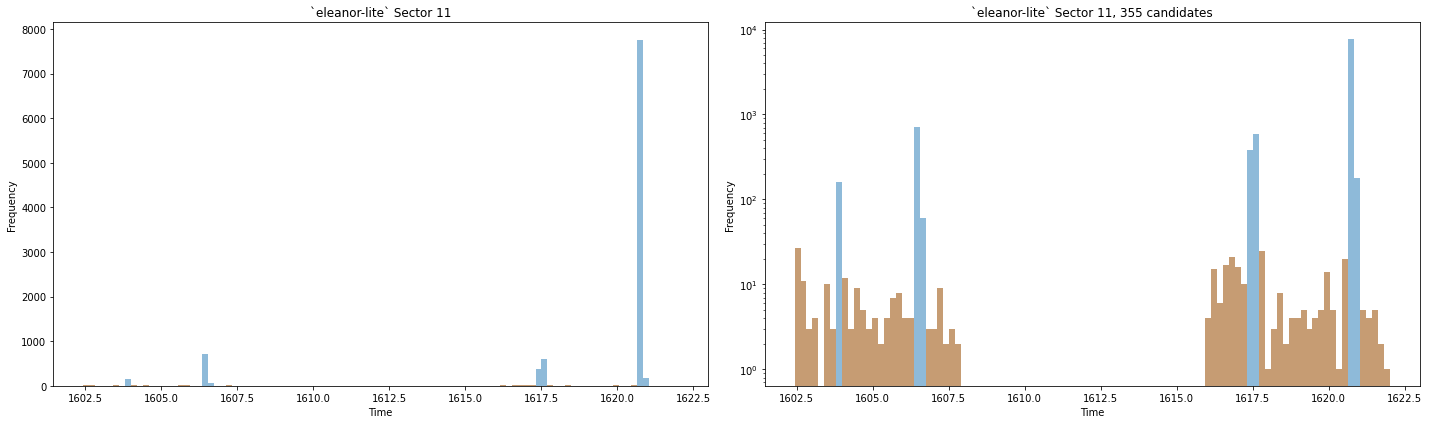

mad threshold: 70.0


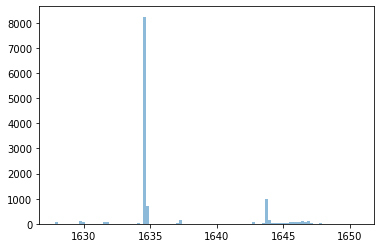

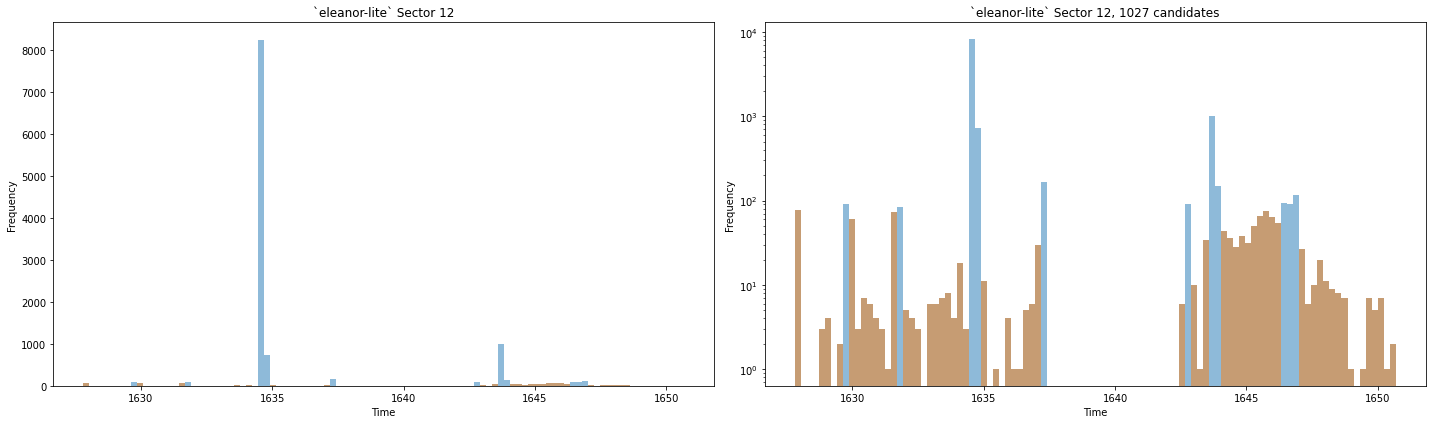

mad threshold: 50.0


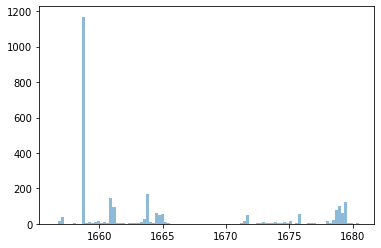

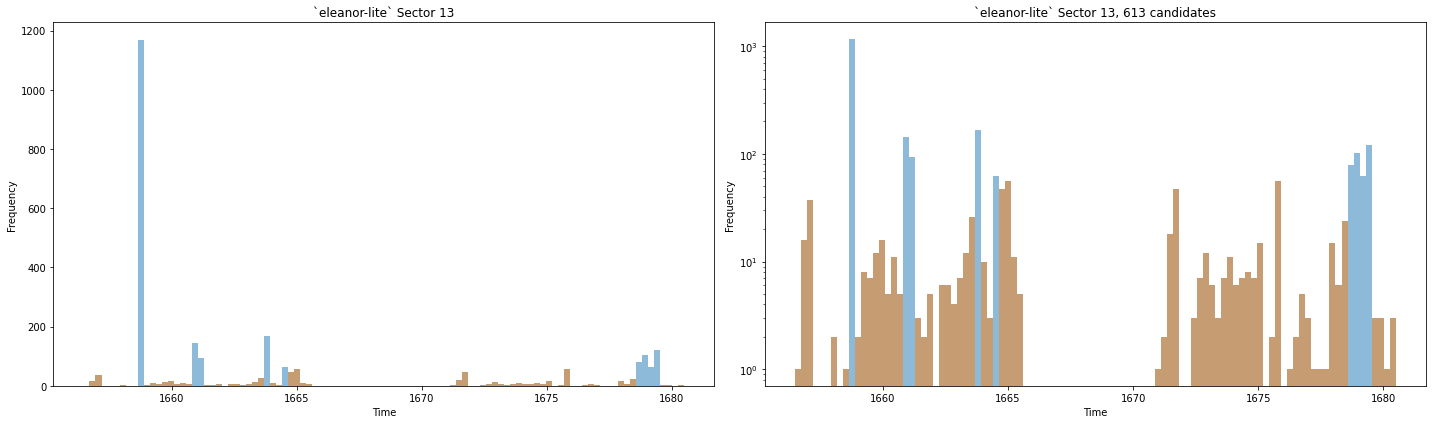

mad threshold: 20.0


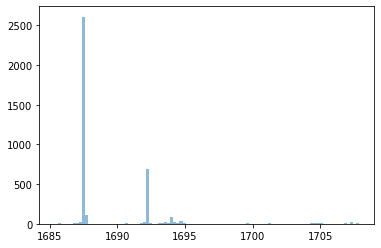

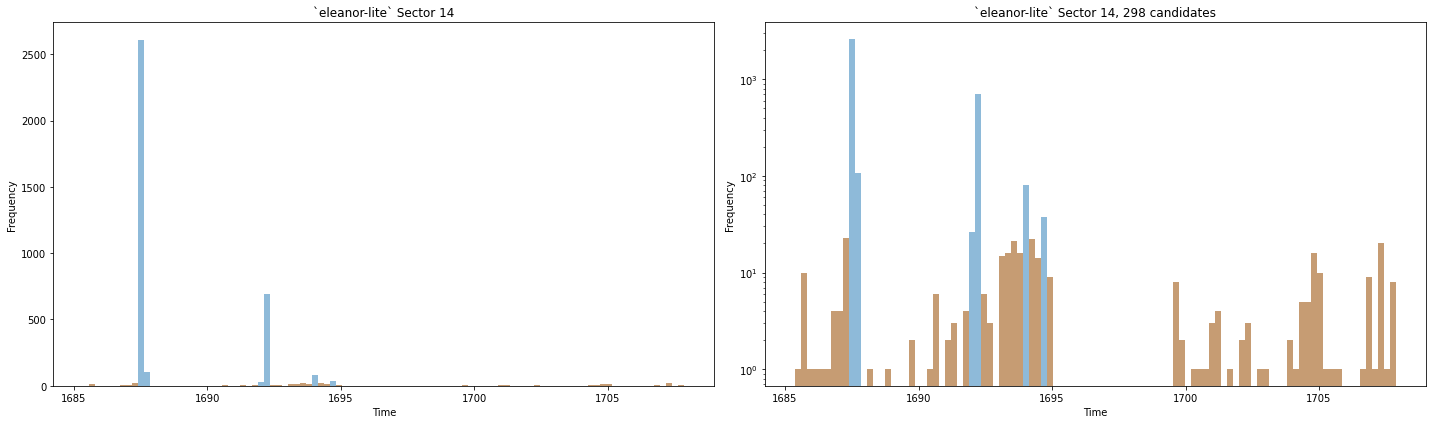

mad threshold: 20.0


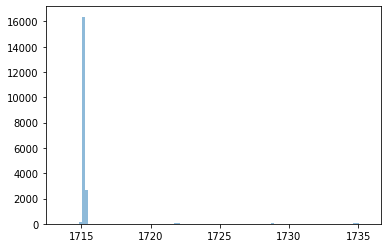

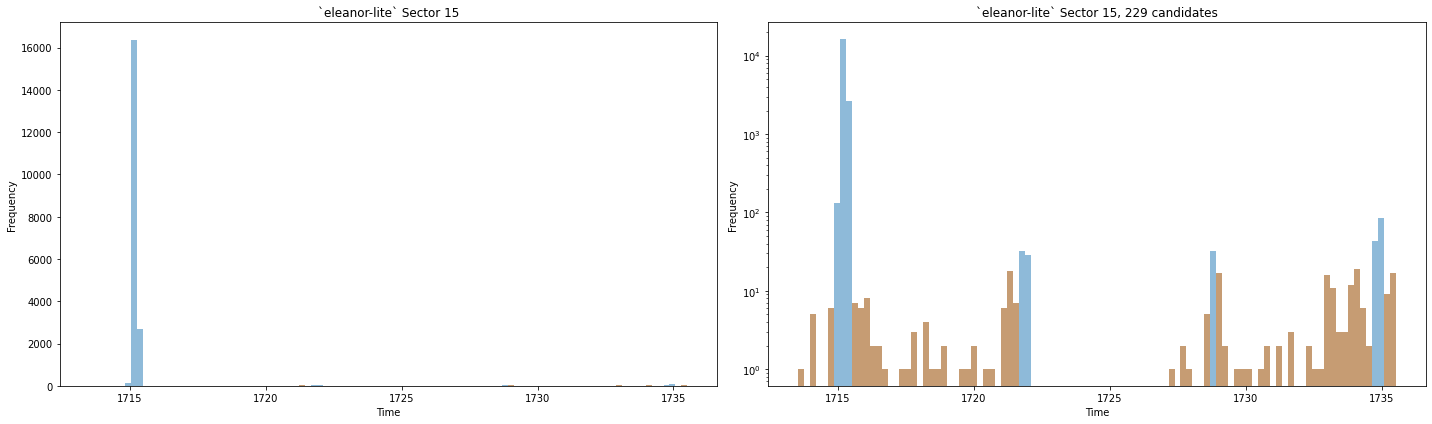

mad threshold: 10.0


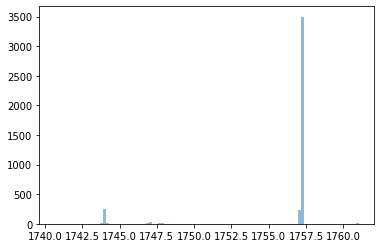

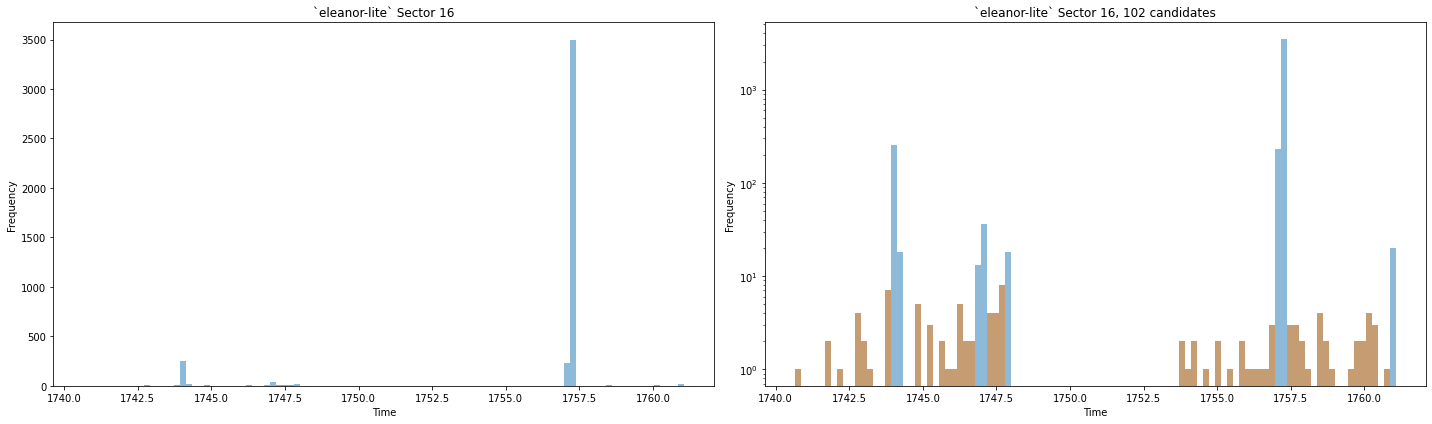

mad threshold: 35.0


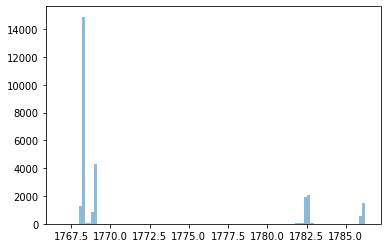

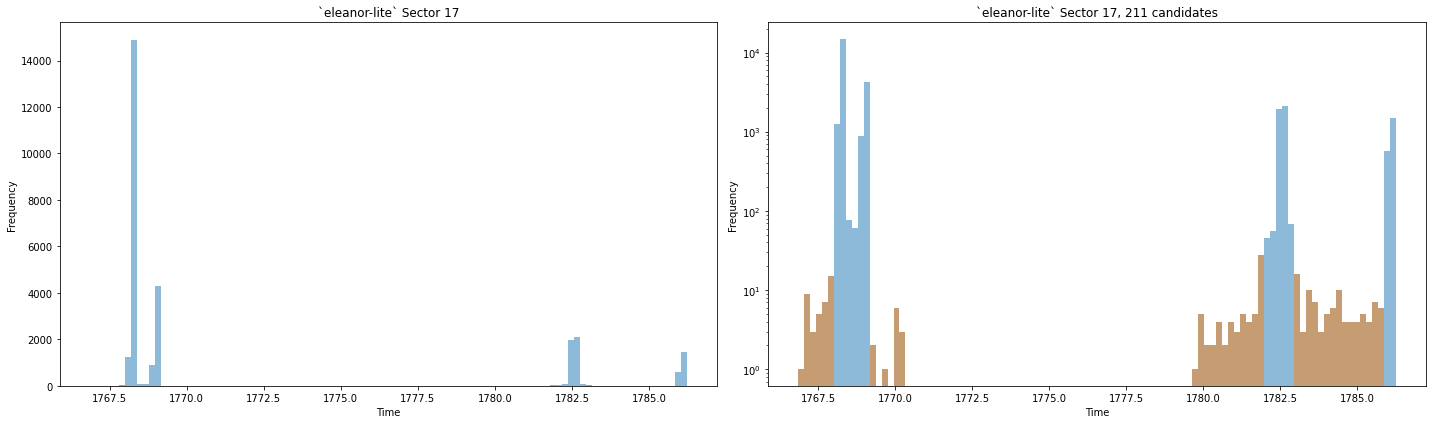

mad threshold: 10.0


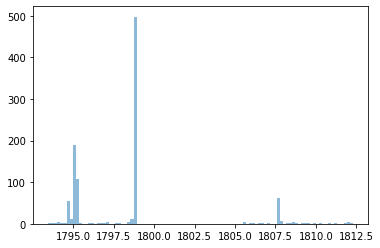

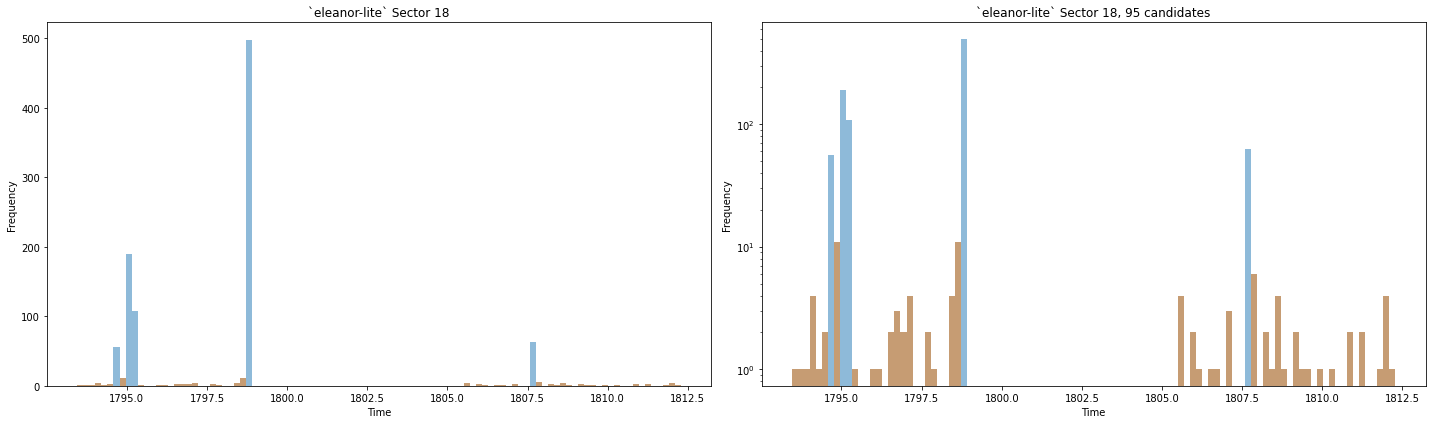

mad threshold: 35.0


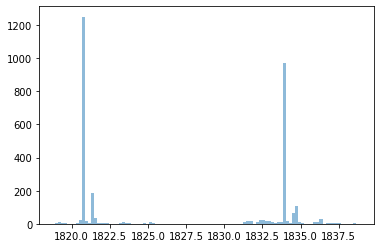

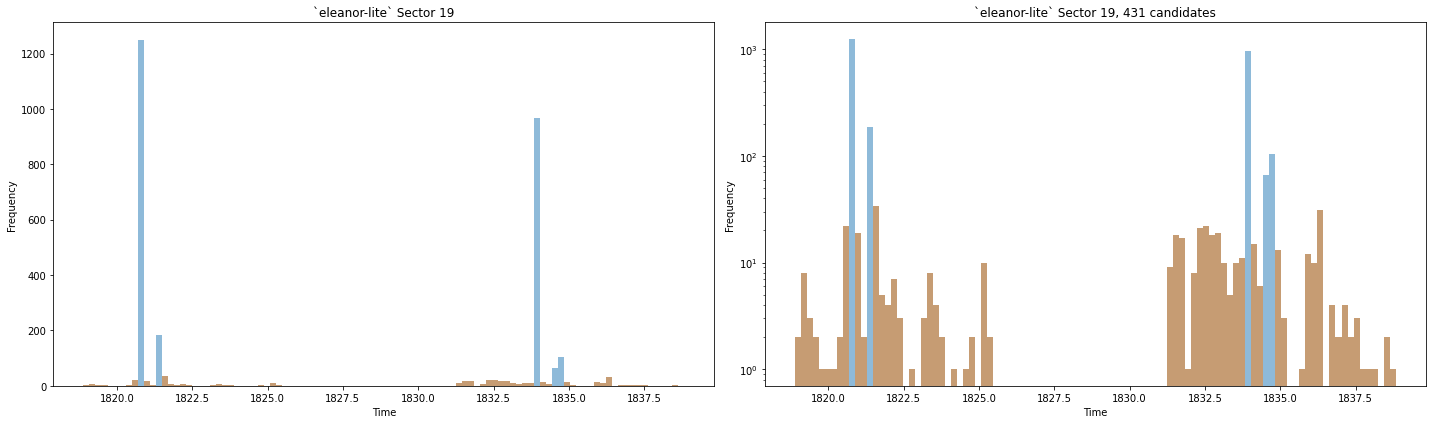

mad threshold: 15.0


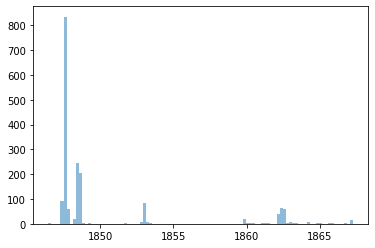

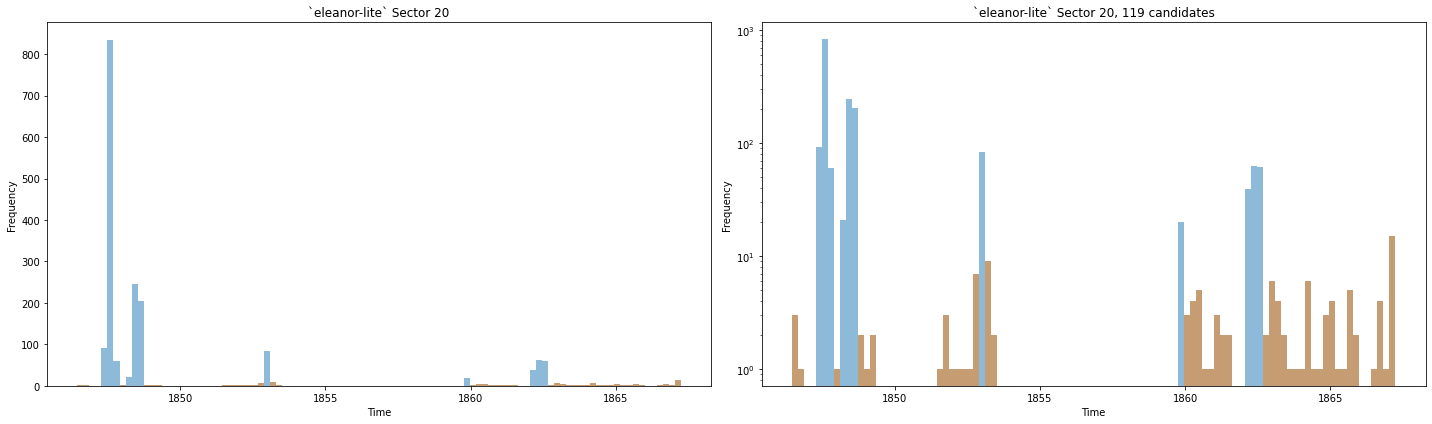

mad threshold: 10.0


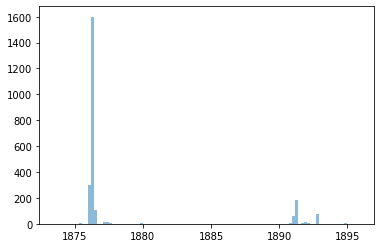

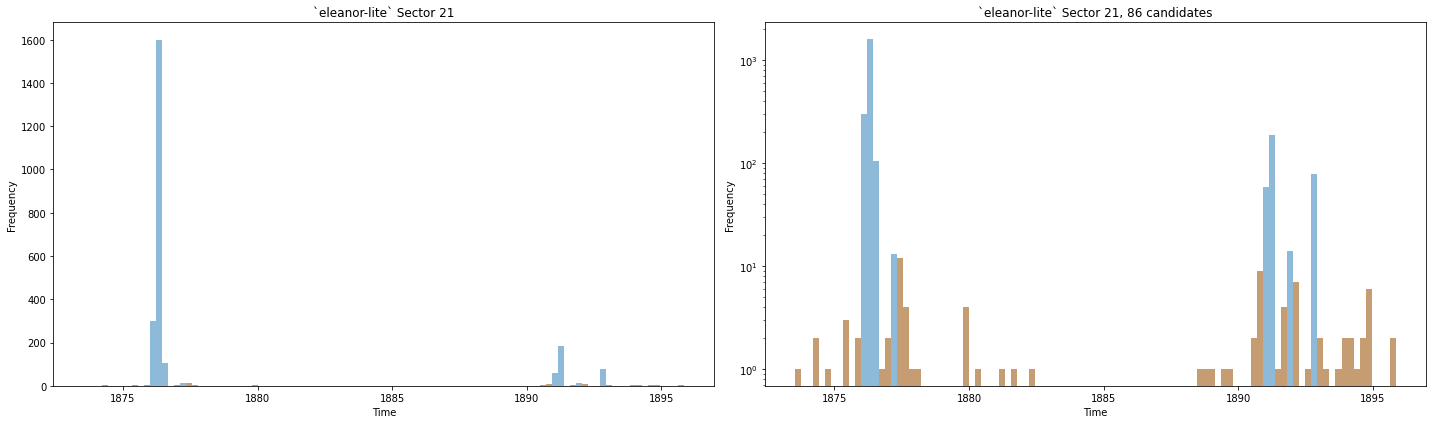

mad threshold: 20.0


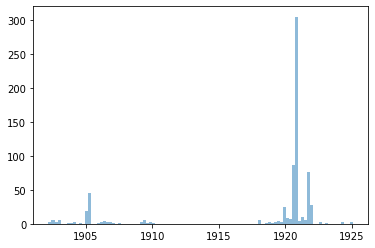

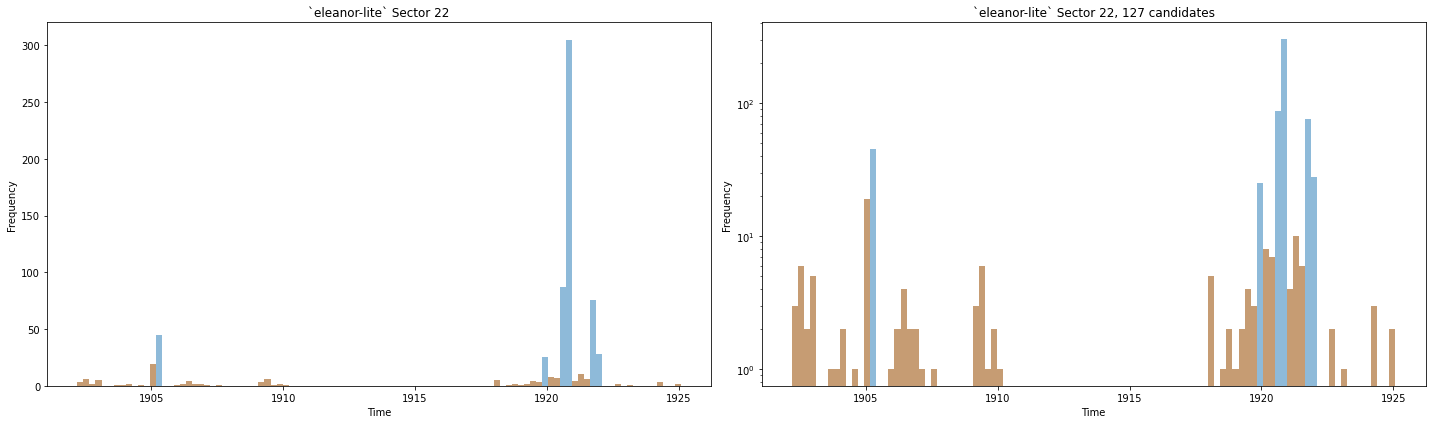

mad threshold: 25.0


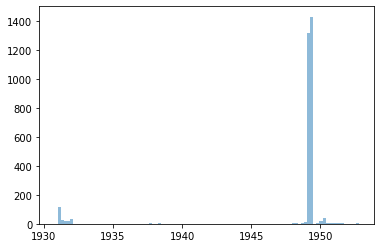

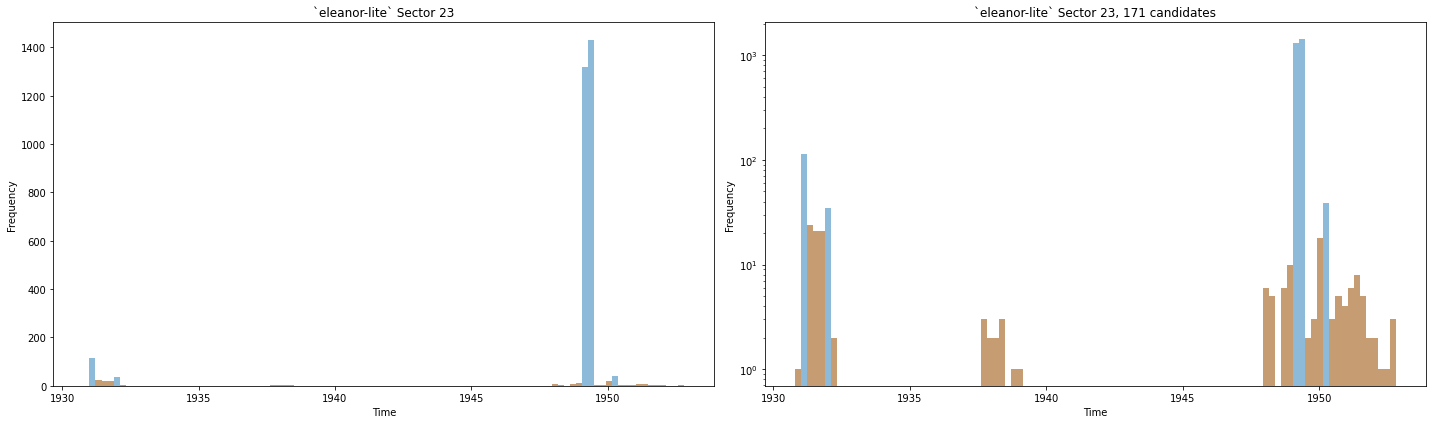

mad threshold: 40.0


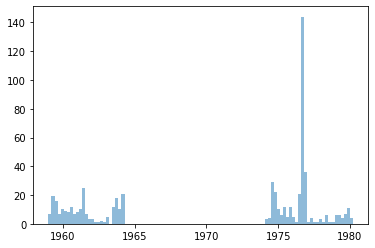

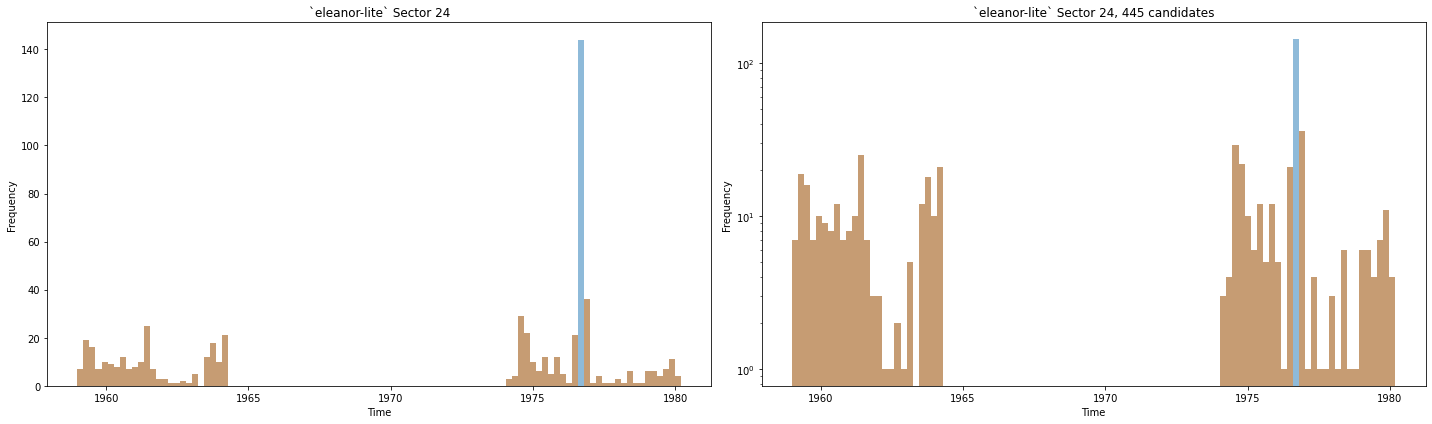

mad threshold: 30.0


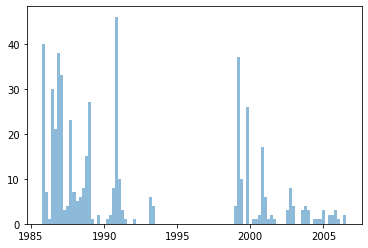

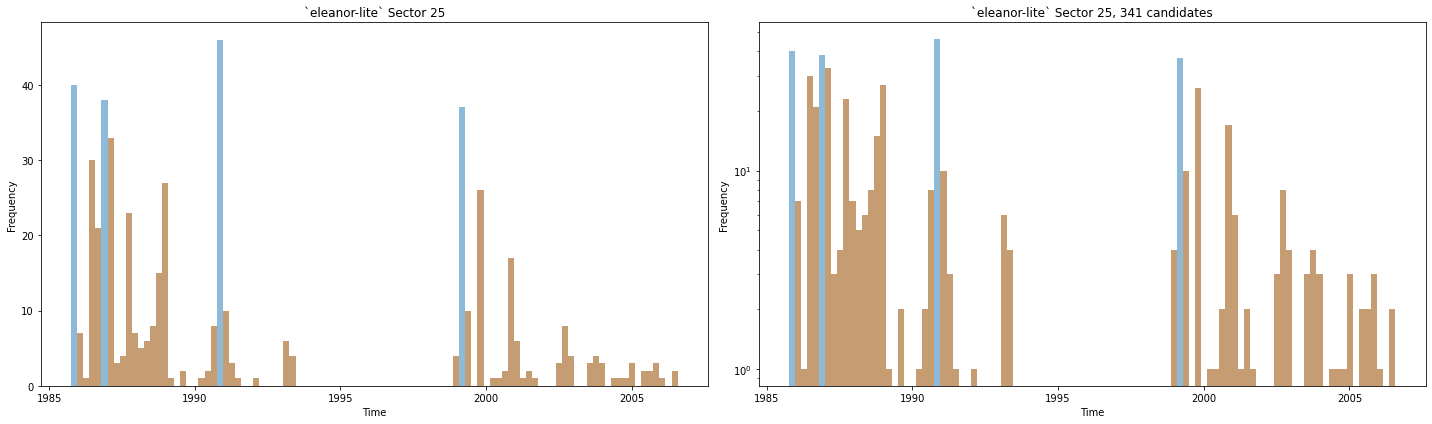

mad threshold: 10.0


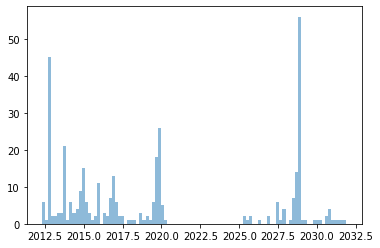

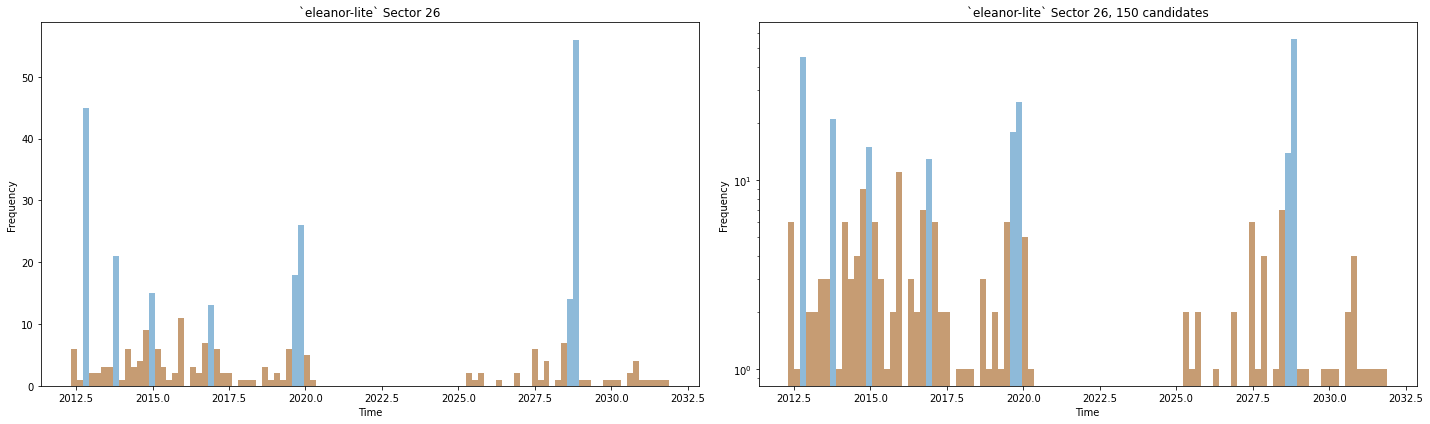

In [11]:
sample_size = []
bad_lcs = {}
good_lcs = {}
pdf_pages = PdfPages("dist_10mad_new.pdf")
for i in range(1,len(sector_values)+1):
    # Construct the dataframe variable name
    try:    
        df = sector_data[f'S{i}']
        data = df[df.transit_prob == 'maybeTransit']
        data = data[(data.asym_score <= 3)].reset_index(drop=True)
        
        data_new = data[(abs(data.snr) >= 5) & (data.asym_score > 0.8) ].reset_index(drop=True) # gets rid of any fits we know should not be the case
        data_new.drop(data_new[data_new['duration'] <= 0.4].index, inplace=True)
        data_new['abs_depth'] = abs(data_new.depth)
        data_new.drop(data_new[(data_new['abs_depth'] >= 0.01)].index, inplace=True)
        sample_size.append(len(data_new))

    except KeyError:
        # Handle the case where the dataframe variable doesn't exist
        print(f"Dataframe '{i}' not found. Moving to the next sector.")
        continue
        
    ## Get the path for the first lightcurve in each sector
    first_abs_path = data.loc[0, 'abs_path']
    lc, _ = import_lightcurve(first_abs_path)

    fig10, ax10 = plt.subplots()
    counts, bin_edges, _ = ax10.hist(data_new['time'], bins=100, alpha=0.5, label='Original Histogram')
    counts[counts == 0] = np.nan
    #counts_nonzeros = [x for x in counts if x != 0]

    
    # Method 1: Median Absolute Deviation (MAD)
    ## calculate median, mad, and then mad threshold
    median = np.nanmedian(counts)
    mad = np.nanmedian(np.abs(counts - median)) # median of absolute deviations from the median
    mad_threshold = 10 * mad
    mad_anomalous_bins = [i for i, value in enumerate(counts) if np.abs(value - median) > mad_threshold] # index of bins of the anomalous data
    
    # bins of anomalous data
    anomalous_bins = np.abs(counts - median) > mad_threshold
    #anomalous_bins = [anomalous_bins[i] for i in range(len(counts)) if counts[i] != 0]

    # Calculate the counts in the anomalous bins
    anomalous_counts = counts[anomalous_bins]
    total_anomalous_count = np.sum(anomalous_counts)

    print(f"mad threshold: {mad_threshold}")
    
    
    # Extract the bin edges corresponding to the anomalous bins
    anomalous_bin_edges = bin_edges[:-1][anomalous_bins]

    # Calculate the left edge of the anomalous bins
    anomalous_bin_left_edges = anomalous_bin_edges
    
    # Calculate the width of each bin
    bin_width = bin_edges[1] - bin_edges[0]

    # Calculate the right edge of the anomalous bins
    anomalous_bin_right_edges = anomalous_bin_edges + bin_width

    for j in mad_anomalous_bins:
        counts[j] = 0  # Set to zero or any other appropriate value
        
    # Create a boolean mask to identify rows in the DataFrame that belong to anomalous bins
    anomalous_mask = np.zeros(len(data_new), dtype=bool)

    for left_bin, right_bin in zip(anomalous_bin_left_edges, anomalous_bin_right_edges):
        # Check if 'time' values in each row fall within the current anomalous bin
        anomalous_mask |= (data_new['time'] >= left_bin) & (data_new['time'] <= right_bin)

    # Invert the mask to get rows that are NOT in anomalous bins
    non_anomalous_rows = ~anomalous_mask
    # Filter your DataFrame to keep only non-anomalous rows
    
    #data_to_export = data_new[~(data_new.time >= 1948.77439) & (data_new.time <= 1949.5188366666666)] 
    
    
    data_to_export = data_new[non_anomalous_rows] 
    good_lcs[f"S{i}"] = data_new[non_anomalous_rows]
    bad_lcs[f"S{i}"] = data_new[~non_anomalous_rows]
    
    
    bad_tic_ids = data_new[~anomalous_mask]['TIC_ID']
    ### plot RA DEC for all candidates, colour map on bad times
    
    merged_df = pd.merge(tic, data_new, left_on='tic_id', right_on='TIC_ID')
    bad_df = pd.merge(tic,bad_lcs[f"S{i}"], left_on='tic_id', right_on='TIC_ID')
    
    # Calculate RA and DEC for the entire dataset
    RA_all = merged_df.RA_orig.values * u.degree
    DEC_all = merged_df.DEC_orig.values * u.degree
    c_all = SkyCoord(ra=RA_all, dec=DEC_all, frame='icrs')
    ra_rad_all = c_all.ra.wrap_at(180 * u.degree).radian
    dec_rad_all = c_all.dec.radian
    
    RA_bad = bad_df.RA_orig.values * u.degree
    DEC_bad = bad_df.DEC_orig.values * u.degree
    c_bad = SkyCoord(ra=RA_bad, dec=DEC_bad, frame='icrs')
    ra_rad_bad = c_bad.ra.wrap_at(180 * u.degree).radian
    dec_rad_bad = c_bad.dec.radian
    
    

    # Create a new figure for the Mollweide plot
#     fig_mollweide = plt.figure(figsize=(8, 6))
#     ax_mollweide = fig_mollweide.add_subplot(111, projection='mollweide')


#     ax_mollweide.scatter(ra_rad_all, dec_rad_all, s=8, c='blue', label='Lightcurves')
#     ax_mollweide.scatter(ra_rad_bad, dec_rad_bad, s=8, c='red',label='Bad Lightcurves')


#     ax_mollweide.set_title(f'Sector {i}')
#     ax_mollweide.grid()

    # Add a legend to the Mollweide plot
    #legend_labels = [mpatches.Patch(color='red', label='Bad Lightcurves'), mpatches.Patch(color='blue', label='Lightcurves')]
#     ax_mollweide.legend(loc='upper right')

    # Adjust the size of the colorbar if needed
    #cbar = fig_mollweide.colorbar(scatter_bad, ax=ax_mollweide, fraction=0.01)
    #cbar.set_label('TIC IDs')

    # Now, create a new figure for the other subplots
    
    # Calculate the histogram values and bin edges using np.histogram
    time_histogram, bin_edges = np.histogram(data_new['time'], bins=100)
    # Plot the original 'data_new.time' histogram
    fig, ax = plt.subplots(1,2,figsize=(20,6))
    #ax[0].hist(data_new['time'], bins=bin_edges, alpha=0.5)
    ax[0].hist(data_new['time'], bins=bin_edges, alpha=0.5)
    ax[0].hist(data_to_export['time'], bins=bin_edges, alpha=0.5)

    #ax[1].hist(data_xrp['time'], bins=bin_edges, alpha=0.5)
    ax[0].set_title('`eleanor-lite` Sector {}'.format(i))
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Frequency')
    #ax[0].axhline(mad_threshold)

    ax[1].hist(data_new['time'], bins=bin_edges, alpha=0.5)
    ax[1].hist(data_to_export['time'], bins=bin_edges, alpha=0.5)
    ax[1].set_title('`eleanor-lite` Sector {}, {} candidates'.format(i,len(data_to_export)))
    ax[1].set_xlabel('Time')
    ax[1].set_ylabel('Frequency')
    ax[1].set_yscale('log')
    
#     h1 = ax[1,0].hist2d(data_new['time'], data_new['duration'], bins=[100,10])
#     ax[1,0].set_title('2D Histogram - All Data')
#     ax[1,0].set_xlabel('Time')
#     ax[1,0].set_ylabel('Duration')
#     plt.colorbar(h1[3], ax=ax[1,0])
    # Adjust layout and display the plot
    
    
#     ax[1,1].scatter(data_new.time, data_new.asym_score)
#     ax[1,1].set_title('Transit Time vs Asymmetry Score')
    
#     ax[2,0].scatter(data_new.time, data_new.skewness)
#     ax[2,0].set_title('Transit Time vs Skewness')
    
    
    plt.tight_layout()
    plt.show()
    pdf_pages.savefig(fig)
    plt.close(fig)
pdf_pages.close()

In [12]:
sum(sample_size)

123824

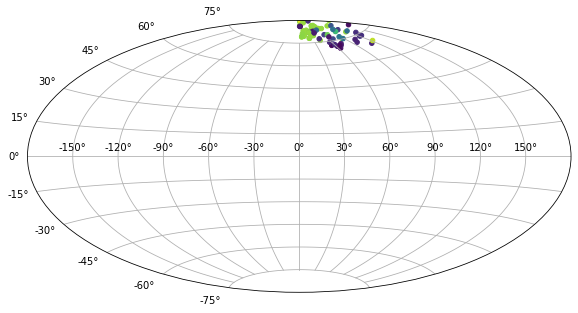

In [13]:
merged_df = pd.merge(tic, data_new, left_on='tic_id', right_on='TIC_ID')
ra = merged_df.RA_orig
dec = merged_df.DEC_orig
transit_time = merged_df.time


ra = np.radians(merged_df.RA_orig)  # Convert RA to radians
dec = np.radians(merged_df.DEC_orig)  # Convert DEC to radians

# Create an Aitoff projection scatter plot
plt.figure(figsize=(10, 5))
plt.subplot(111, projection='aitoff')
plt.grid(True)

# Scatter plot the Aitoff projection
plt.scatter(ra, dec, c=merged_df.time, cmap='viridis', marker='o', s=20)



### Plan for next steps:

Get the clusters. Import lightcurves and run absolute depth on those.
Extract the bins where these bad ones take place.

In [14]:
#combined_df.to_csv('../test.csv',index=False)

---

### Cross-reference Sky Positions

In [15]:
import astropy.units as u

In [16]:
#tic = pd.read_csv('../big_catalog.txt',sep='\t')

In [17]:
# for i in sector_values:
#     try:
#         merge_bad_df = pd.merge(tic, bad_lcs[f'S{i}'], left_on='tic_id', right_on='TIC_ID')
#         merge_good_df = pd.merge(tic, good_lcs[f'S{i}'], left_on='tic_id', right_on='TIC_ID')
#     except KeyError:
#         # Handle the case where the dataframe variable doesn't exist
#         print(f"Dataframe '{i}' not found. Moving to the next sector.")
#         continue
        
#     RA = merge_bad_df.RA_orig.values * u.degree
#     DEC = merge_bad_df.DEC_orig.values * u.degree
#     c = SkyCoord(ra=RA, dec=DEC, frame='icrs')
#     ra_rad = c.ra.wrap_at(180 * u.degree).radian
#     dec_rad = c.dec.radian
    
#     RA_good = merge_good_df.RA_orig.values * u.degree
#     DEC_good = merge_good_df.DEC_orig.values * u.degree
#     c = SkyCoord(ra=RA_good, dec=DEC_good, frame='icrs')
#     ra_rad_good = c.ra.wrap_at(180 * u.degree).radian
#     dec_rad_good = c.dec.radian
    
    
    
#     fig5, axx = plt.subplots(1,2,figsize=(12, 6), subplot_kw={'projection': 'mollweide'})
#     axx[0].scatter(ra_rad,dec_rad,s=8)
#     axx[0].set_title(f'Sector {i} bad_lightcurves')
#     axx[1].scatter(ra_rad_good,dec_rad_good,s=8)
#     axx[1].set_title(f'Sector {i} candidates')
#     break

---

## Compare with other pipelines - Test: Sector 21 (random choice)

In [18]:
#import lightkurve as lk

In [19]:
#tic_ids = bad_lcs['S21'].TIC_ID.values[0:5]

In [20]:
# lcs = []
# for tic_id in tqdm(tic_ids):
#     # Use Lightkurve's search_lightcurve function to search for and retrieve the light curve for each TIC ID
#     search_result = lk.search_lightcurve(target=f'TIC {tic_id}', author='QLP',sector=21)  # Author 'SPOC' is for TESS data
   
#     try:
#         lc = search_result[0].download()
    
#         lcs.append(lc)
#     except KeyError:
#         pass

In [21]:
#lk.search_lightcurve(target='TIC 270577175',sector=6,author='QLP')[0].download()

In [22]:
# Create an empty list to store the dataframes
dataframes_list = []

# Iterate through the dictionary and append each dataframe to the list
for key, dataframe in good_lcs.items():
    dataframes_list.append(dataframe)

# Concatenate the dataframes in the list into one large dataframe
combined_dataframe = pd.concat(dataframes_list, axis=0, ignore_index=True)

In [23]:
combined_dataframe = combined_dataframe.drop_duplicates()

In [24]:
len(combined_dataframe)

8358

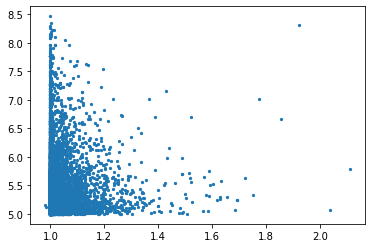

In [25]:
plt.scatter(combined_dataframe.asym_score,abs(combined_dataframe.snr),s=5)

In [26]:
combined_dataframe.to_csv('../som_candidates_eleanor-lite-v3.txt',index=False,header=True)

In [50]:
combined_dataframe.abs_path.to_csv('../som_candidates_eleanor-lite-batch-analyse.txt',index=False,header=None)

### Some examples of bad_lcs

Head of S1:


IndexError: list index out of range

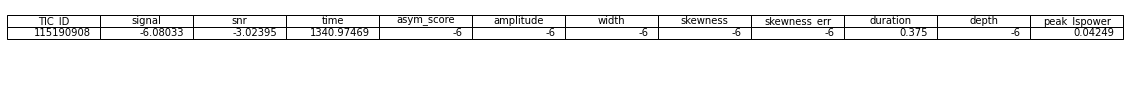

In [24]:
for key, dataframe in bad_lcs.items():
    print(f"Head of {key}:")
    df = bad_lcs[key]
    for i in df.abs_path.head(2):
        lc, lc_info = import_lightcurve(i)
        lc = lc['TIME','PCA_FLUX','QUALITY','FLUX_ERR','FLUX_BKG']
        _, _ = processing(lc,lc_info=lc_info,method='median',make_plots=True)
    break

In [28]:
test = pd.read_csv('../outputs/s6.txt',header=None,sep=" ")

In [36]:
test[test.iloc[:,1] == 270577175][0].values[0]

'/tmp/eleanor-lite/s0006/hlsp_gsfc-eleanor-lite_tess_ffi_s0006-0000000270577175_tess_v1.0_lc.fits'